In [135]:
import pygad
import numpy as np

The following are mock example to the signatures required when working with pygad infrastructure.
We will need to update the references will the article.

In [136]:
def mutation_func(offspring, ga_instance: pygad.GA):
    """
    Custom mutation function format
    :param offspring:
    :param ga_instance:
    :return:
    """

    return offspring

In [137]:
def crossover_func(parents, offspring_size, ga_instance: pygad.GA):
    """
    Custom crossover function format.
    :param parents:
    :param offspring_size:
    :param ga_instance:
    :return:
    """
    return 1

In [145]:
function_weights = np.array([-4, 5, 7, 2.3, -2, 9, 9, -2, 5, 12, 57, 42, 42, 1, -3])
desired_output = 100
epsilon = 0.00001 # To prevent division by 0 errors.
potential_solutions = np.random.randint(-10, 10, (len(function_weights),len(function_weights)))
potential_solutions

array([[ -1,  -3,   8,  -2,  -3, -10,  -7,  -5, -10,  -3,  -3,   3,  -2,
         -7,  -9],
       [ -2,   6,  -3,   3,   0,  -6,   0,  -1,   9,  -1,   8,  -1,  -5,
         -9,  -4],
       [  4,  -5,   5,   0,   1,  -5,   7,  -3,   0,   4,   4,   5,   1,
         -1,   4],
       [ -7,   1,   9,  -1,   7,  -5,   7,   8,  -8,  -4,  -4,  -1,   2,
          0,  -3],
       [  3,   5,  -9,   9,  -6,  -6,   9,   1,  -1,  -2,   5,   7,  -8,
         -3,  -5],
       [  0,  -9,   9,   8,   4,   3,   1,   5,  -7,  -9,   7,   2,  -3,
         -9,   1],
       [  5,   1,  -1,   6,  -1,   4, -10,  -3,  -2,  -5,  -8,   2,  -2,
         -3,  -3],
       [ -4, -10,  -6,  -7,  -6,   1,  -4,   1,   1,   8,   8,  -8,  -6,
          1,  -6],
       [ -5, -10,  -7,   6,  -3,  -4,   7,   7,  -6,  -6,   4,  -9,   4,
         -2,   6],
       [  5,  -6,  -7,   2,   0,   7,  -3,  -9,  -4,   7,   7,  -6,   6,
          8,   7],
       [  7,  -2,  -2,   4,   2,  -5,   5,  -2,   7,  -6,   7,   3, -10,
       

In [146]:
def fitness_func_arr_of_weights(ga_instance, solution, solution_idx):
    # Coded as an array of weights.
    # TODO Here we can insert the feature selection and train the model, then classify, to measure fitness.
    # TODO The higher fitness, the better.
    summed_rows = np.sum(potential_solutions, axis=1)
    solution_to_check = np.multiply(summed_rows, solution)
    output = np.sum(solution_to_check * function_weights)
    fitness = 1.0 / (np.abs(output - desired_output) + epsilon) #
    return fitness

In [147]:
fitness_function = fitness_func_arr_of_weights

In [148]:
num_generations = 300
num_parents_mating = 4

sol_per_pop = 12
num_genes = function_weights.size # Use this to control the number of feature selection potential solutions is used.

init_range_low = 0
init_range_high = 10

parent_selection_type = "sss" #steady-state selection, meaning it selects the parents with the highest fitness.
keep_parents = 1

crossover_type = "single_point" # Swaps the chromosomes from a certain index onwards between the parents.

mutation_type = "random"
mutation_percent_genes = 20
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating, # Num of parents to select each generation.
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop, # Number of solutions per population.
                       num_genes=num_genes, # Effectively, the thing that is tweaked for each generation.
                       # gene_type=list[float], # The type of gene, meaning of each value inside a chromosome. Supports list.
                       init_range_low=init_range_low, # dependent on the gene type, the range of values to be generated.
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents, # Number of parents to keep from current population.
                       # keep_elitism = 1, # The number of the solutions with the best fitness that will be kept for next generation.
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_by_replacement=True, # If the previous gene is replaced or not.
                       mutation_percent_genes=mutation_percent_genes, # The probability that each gene will be mutated
                       # crossover_type=crossover_func, Can be used to customize a crossover func.
                       # mutation_type=mutation_func, Can be used to customize a mutation func.
                       )

ga_instance.run()
print('--------------------------------------------------')
print(f'Generation: {num_generations}')
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
summed_rows_out = np.sum(potential_solutions, axis=1)
solution_to_check_out = np.multiply(summed_rows_out, solution)
output_out = np.sum(solution_to_check_out * function_weights)
print("Predicted output based on the best solution : {prediction}".format(prediction=output_out))

--------------------------------------------------
Generation: 300
Parameters of the best solution : [-0.1738395   0.89027897  0.33484376 -0.16969611  0.49959872 -0.24377263
 -0.57551577 -0.88331578  0.5418738   9.30269753  3.23977195  4.85333213
 -0.19225629  0.02458481  0.83777856]
Fitness value of the best solution = 11.35882389454771
Predicted output based on the best solution : 100.0880272835501


Visualize:

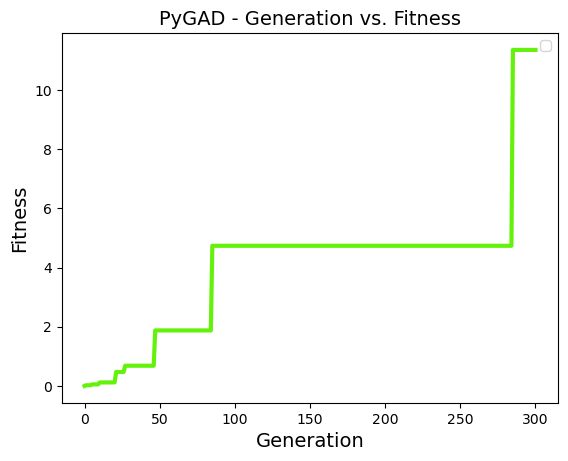

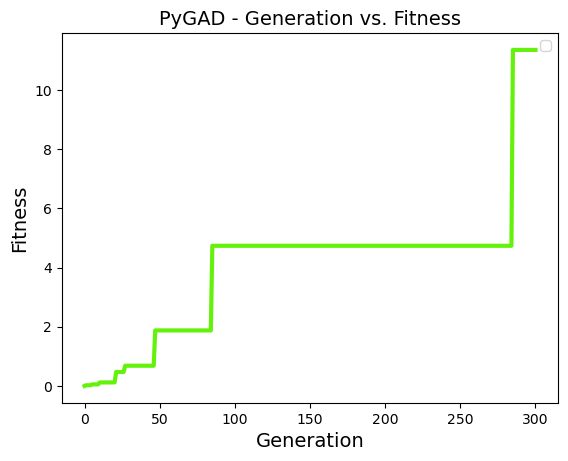

In [149]:
ga_instance.plot_fitness()